# <font color=blue|red|green|pink|yellow>CIA-3 : Working with Pandas on Adult data set</font>

#### Import the Library

In [67]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog

#### Loading the Datset 

In [108]:
a=[]
r= tk.Tk()
canvas1 = tk.Canvas(r, width = 300, height = 300, bg = 'lightsteelblue2')
canvas1.pack()

def getCSV ():
    global data
    file = filedialog.askopenfilename()
    data = pd.read_csv (file)
Button = tk.Button(text="      Import CSV File     ", command=getCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=Button)
r.mainloop()

In [109]:
data.head(3) # Shows the top 3 rows 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


#### Question1 : How many men and women (sex feature) are represented in this dataset?


In [113]:
#Answer:

print("\t\t=================output======================")
count=data['sex'].value_counts() 
print("The number of Male and female given below :\n",count)

# Value_counts Function will return the counts of object in the dataset.

		=================output======================
The number of Male and female given below :
 Male      21790
Female    10771
Name: sex, dtype: int64


#### Question 2: What is the average age (age feature) of women?
 

In [114]:
#Answer:
print("\t\t=================output======================")
avg=data[data['sex']=='Female'].mean()['age']
print("Average age of female is:",round(avg,1))

		=================output======================
Average age of female is: 36.9


#### Question 3: What is the percentage of German citizens (native-country feature)?


In [117]:
# Answer :
# First we are trying how many rows are there in the datset
numOfRows = data.shape[0]
print("The Number of people mentioned here:",numOfRows)
Number_Of_germans=len(data[data["native-country"]=="Germany"])
print("The Number of Germans :",Number_Of_germans)
Percentage=(Number_Of_germans/numOfRows)*100
print("The Percenatge of Germans are:",Percentage)

The Number of people mentioned here: 32561
The Number of Germans : 137
The Percenatge of Germans are: 0.42074874850281013


#### Question 4-5: What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?


In [118]:
#Answer:
mean=data.groupby('salary')['age'].mean()
print("The mean of age whose salary <=50K and >=50K is given below:\n ",  mean)
std=data.groupby('salary')['age'].std()
print("The Std.deviation of age whose salary <=50K and >=50K is:\n ",std)

The mean of age whose salary <=50K and >=50K is given below:
  salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64
The Std.deviation of age whose salary <=50K and >=50K is:
  salary
<=50K    14.020088
>50K     10.519028
Name: age, dtype: float64


#### Question6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate 



In [121]:
#Answer :

cnt=data[(data['salary']=='>50K')&(data['education']!='Assoc-acdm')&(data['education']!='Bachelors')&(data['education']!='Assoc-voc')&(data['education']!='Prof-school')&(data['education']!='Masters')&(data['education']!='Doctorate')].count()['salary']
print("\t\t=================output======================")
print("There are %d no of people who are getting more than 50K without higher education"%cnt)
print("So it is not true that people who earn more than 50K have at least high school education")

		=================output======================
There are 3306 no of people who are getting more than 50K without higher education
So it is not true that people who earn more than 50K have at least high school education


#### Question 7 :Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race



In [120]:
#Answer:
print("\t\t=================output======================")
race=data.groupby('race')['age'].describe()
print(race)
gender=data.groupby('race')['sex'].describe()
print(gender)
substr=data[(data['race']=='Amer-Indian-Eskimo')&(data['sex']=='Male')]
print("Maximum age of men of Amer-Indian-Eskimo race:",substr['age'].max() )

		=================output======================
                      count       mean        std   min   25%   50%   75%  \
race                                                                        
Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  28.0  35.0  45.5   
Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  28.0  36.0  45.0   
Black                3124.0  37.767926  12.759290  17.0  28.0  36.0  46.0   
Other                 271.0  33.457565  11.538865  17.0  25.0  31.0  41.0   
White               27816.0  38.769881  13.782306  17.0  28.0  37.0  48.0   

                     max  
race                      
Amer-Indian-Eskimo  82.0  
Asian-Pac-Islander  90.0  
Black               90.0  
Other               77.0  
White               90.0  
                    count unique   top   freq
race                                         
Amer-Indian-Eskimo    311      2  Male    192
Asian-Pac-Islander   1039      2  Male    693
Black                3124      2  Male 

#### Question 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.




In [127]:
a=data[(data.salary=='>50K')&(data.sex=='Male')]
cnt=a[(a['marital-status']=='Married-civ-spouse')|(a['marital-status']=='Married-spouse-absent')|(a['marital-status']=='Married-AF-spouse')].count()['marital-status']      
cnt1=(len(a)-cnt)
print("\t\t=================output======================")
print("Maried person having more than 50K salary:",cnt)
print("single men having more than 50k salary:",cnt1)
if(cnt>cnt1):
     print("Maried people are getting higher >50K salary")
if(cnt1>cnt):
    print("single men are getting higher >50K salary")
if(cnt==cnt1):
    print("Both married and singles are getting equal number of >50K salary")

		=================output======================
Maried person having more than 50K salary: 5965
single men having more than 50k salary: 697
Maried people are getting higher >50K salary


#### Question 9: What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?



In [123]:
#Answer:

a1=data['hours-per-week'].max()
b1=data[data['hours-per-week'] ==a1].count()['hours-per-week']
c1=data[(data['hours-per-week'] ==a1)&(data['salary']=='>50K')].count()['salary']
print("\t\t=================output======================")
print("Maximum number of hours a person work:",a1)
print("No of people working for maximum no of hours:",b1)
print("percentage of Maximum hour working people who are earning more than 50K:",c1)

		=================output======================
Maximum number of hours a person work: 99
No of people working for maximum no of hours: 85
percentage of Maximum hour working people who are earning more than 50K: 25


#### Question 10: Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?


In [124]:
#Code
pd.crosstab(adult['native-country'], adult['salary'], 
           values=adult['hours-per-week'], aggfunc=np.mean)
#The pandas crosstab function builds a cross-tabulation table that can show the 
#frequency OR average based on the aggfunction .


salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


In [79]:
print("\t\t=================EXTRA QUESTIONS======================")

		=================EXTRA QUESTIONS======================


#### 11.Display the No of people working in State-gov with higher education


In [125]:
#Answer:

ans=data[(data['workclass']=='State-gov')&(data['education']!='Assoc-acdm')&((data['education']=='Bachelors')|(data['education']=='Assoc-voc')|(data['education']=='Prof-school')|(data['education']=='Masters')|(data['education']=='Doctorate'))&(data['salary']=='>50K')].count()['salary']
print("\t\t=================OUTPUT======================")
print("No of people working i state goverment with higher education and having salary more than 50K:",ans)

		=================OUTPUT======================
No of people working i state goverment with higher education and having salary more than 50K: 262


#### Question 12:Display the count of higher salary and lower salary people in occupation wise.


In [95]:
#Answer:

s=data[data['salary']=='>50K']
s1=data[data['salary']=='<=50K']
cnt=s.groupby('occupation')['salary'].count()
cnt1=s1.groupby('occupation')['salary'].count()
print("\t===============people having higher salary in occupation wise====================\n",cnt )
print("\t===============people having lower salary in occupation wise====================\n",cnt1 )

	===============people having higher salary in occupation wise====================
 occupation
?                     191
Adm-clerical          507
Armed-Forces            1
Craft-repair          929
Exec-managerial      1968
Farming-fishing       115
Handlers-cleaners      86
Machine-op-inspct     250
Other-service         137
Priv-house-serv         1
Prof-specialty       1859
Protective-serv       211
Sales                 983
Tech-support          283
Transport-moving      320
Name: salary, dtype: int64
	===============people having lower salary in occupation wise====================
 occupation
?                    1652
Adm-clerical         3263
Armed-Forces            8
Craft-repair         3170
Exec-managerial      2098
Farming-fishing       879
Handlers-cleaners    1284
Machine-op-inspct    1752
Other-service        3158
Priv-house-serv       148
Prof-specialty       2281
Protective-serv       438
Sales                2667
Tech-support          645
Transport-moving     1277
Name

#### Question 13:Display the average age of people for all nation.

In [96]:
#Answer:

ans=data.groupby('native-country').mean()['age']
print("Average age of people for all nation\n",round(ans))

Average age of people for all nation
 native-country
?                             39.0
Cambodia                      38.0
Canada                        43.0
China                         43.0
Columbia                      40.0
Cuba                          46.0
Dominican-Republic            38.0
Ecuador                       37.0
El-Salvador                   34.0
England                       41.0
France                        39.0
Germany                       39.0
Greece                        46.0
Guatemala                     32.0
Haiti                         38.0
Holand-Netherlands            32.0
Honduras                      34.0
Hong                          34.0
Hungary                       49.0
India                         38.0
Iran                          39.0
Ireland                       36.0
Italy                         46.0
Jamaica                       36.0
Japan                         38.0
Laos                          35.0
Mexico                        33.0
Ni

#### Question 14:Is there is any relation between working hours and salary.

In [ ]:
#Answer:
ans=round(data['hours-per-week'].mean())
ans1=data[(data['salary']=='>50K')&(data['hours-per-week']>=ans)].count()['hours-per-week']
ans2=data[(data['salary']=='>50K')&(data['hours-per-week']<=ans)].count()['hours-per-week']
print(ans1,ans2)
print("There is no relation between these two variables")

#### Question 15:calculate the frequency of workclass.

In [94]:
#Answer:
data.groupby('workclass').count()

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
workclass,,,,,,,,,,,,,,
?,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
Federal-gov,960,960,960,960,960,960,960,960,960,960,960,960,960,960
Local-gov,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093
Never-worked,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Private,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696,22696
Self-emp-inc,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116
Self-emp-not-inc,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541
State-gov,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
Without-pay,14,14,14,14,14,14,14,14,14,14,14,14,14,14


#### Question 16:calculate the count of Indian having more than 50K salary.

In [93]:
#Answer:
ans=data[(data['native-country']=='India')&(data['salary']=='>50K')].count()['salary']
print("Indian having more than 50K salary:",ans)

Indian having more than 50K salary: 40


#### Question 17:calculate the maximum age in occupation wise.

In [92]:
#Answer:
data.groupby('occupation').max()['age']

occupation
?                    90
Adm-clerical         90
Armed-Forces         46
Craft-repair         90
Exec-managerial      90
Farming-fishing      90
Handlers-cleaners    90
Machine-op-inspct    90
Other-service        90
Priv-house-serv      81
Prof-specialty       90
Protective-serv      90
Sales                90
Tech-support         73
Transport-moving     90
Name: age, dtype: int64

#### Question 18:calculate the frequency of race for indian citizen.

In [91]:
#Answer
ans1=data[data['native-country']=='India']
ans=ans1.groupby('race')['native-country'].count()
print("Frequency of race for indian citizen:",ans)

Frequency of race for indian citizen: race
Asian-Pac-Islander    85
Black                  2
Other                  5
White                  8
Name: native-country, dtype: int64


#### Question 19:calculate average age for each gender.

In [87]:
#Answer:
data.groupby('sex').mean()['age']#Answer:


sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

#### Question 20:Display the count of person who are working privately and got maried having the salary of more than 50K.

In [88]:
#Answer:
ans=data[(data['workclass']=='Private')&((data['marital-status']=='Married-civ-spouse')|(data['marital-status']=='Married-spouse-absent')|(data['marital-status']=='Married-AF-spouse'))&(data['salary']=='>50K')].count()['salary']                                                                     
print("Person who are working privately and got maried having the salary of more than 50K:",ans)

Person who are working privately and got maried having the salary of more than 50K: 4247


#### Question-21  Represent the workclass based on the count?

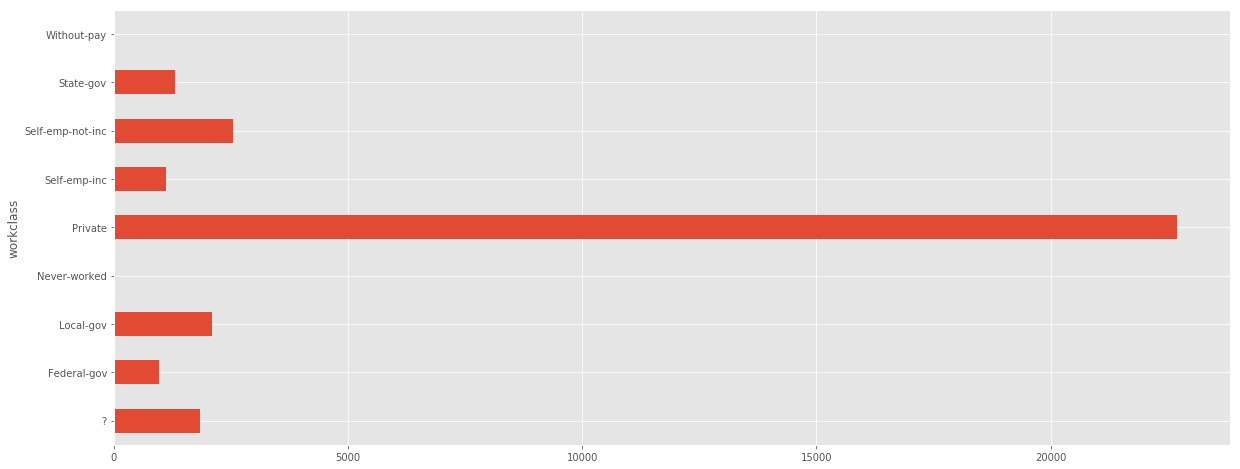

In [90]:
#Answer:
se=data.groupby('workclass')['salary'].count()
se
import matplotlib.pyplot as plt
plt.style.use('ggplot')
se.T.plot(kind='barh', figsize=(20,8))

#### Question 22 :What is the mean age of those working in the Armed Forces?

In [99]:
#Answer:
avg=data.loc[data['occupation']=='Armed-Forces','age'].mean()
print("The Average age of people working in Armed forces is",round(avg,1))

The Average age of people working in Armed forces is 30.2


#### Question 23 : What is the total average value of hours per week that males and females each work

In [102]:
#Code:
hr=data.groupby('sex').mean()['hours-per-week']
print(" The total average value of hours per week that males and females work are\n",hr)

 The total average value of hours per week that males and females work are
 sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64
